## Predicting Retirement Wealth in CFD Dataset

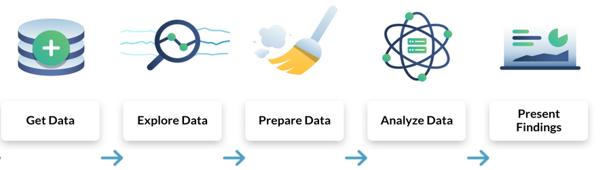

### Introduction

The objective of this training project (task-1) is to predict the account balance of an bank customer with dataset in 2016 and 2017 using Pythonv 3.7. The dataset wa sourced from the CFD which is one of the largest company in supperannuation in Australia. This report is organized as follows: 

1- Overview section describes the dataset used and the features in this dataset.

2- Data Preparation section covers data cleaning and data preparation steps. 

3- Data Exploration section explores dataset features and their inter-relationships.

4- Methodology section describes how to estimate the customer's account balance in the retirement age 67 and Program flowchart. 

5- Summary and Conclusions section provides a summary of our work and presents our findings.

### Overview

#### Data Source:

The CFD datasets provide two dataset features_201612.xlsx and features_201712.xlsx with a lot of features (culomns), but only age, current_balance, ID and SEIFA Index were useful in this project. The feature_description_jb.xlsx file contains the details of the variables (features or attributes). The dataset has 214296 observations. In this project, we use the dataset " features_201612.xlsx" only to calcualte median growrth instances to growth_lastyear. You can find further information in methodology section. 

#### Project Objective:

Our goal is to see if we can predict an individual's account balance in retired age 67 years within an acceptable increase or decrease in comparison with the amount of current account balance. we will predict account balance in age 67 based on the amount of median growth of the account balance in previous years and curent customer's account balance. 

#### Target Feature:

Our target feature is account balance in age 67 years. 

#### Descriptive Features:

The variable descriptions below are from the feature_description_jb.xlsx file: 

gender: Female, Male

age: customer age

acc_balance: account balance

acc_balance_201612: account balance in 2016

acc_balance_201712: current account balance in 2017

growth_lastyear: Median growth of customer account balance

seifa: SEIFA Index number between 1 and 10. 
Socio-Economic Indexes for Areas 

postcode: Postcode


## Data Preparation

#### Preliminaries

 First, we import all the common modules we will be using. We read data from an excel file. 

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [2]:
data = pd.read_excel('features_201712.xlsx', na_values='n/a')

In [3]:
data.head(1)

,new_id,postcode,seifa,gender,age,acc_balance_201612,acc_balance_201712,growth_lastyear
0,3400477,4037,10,F,2.9,5496.17,6652.53,1156.36


We first confirm that the feature types match the descriptions outlined in the documentation. 

In [4]:
print(f"Shape of the dataset is {data.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(data.dtypes)

Shape of the dataset is (214296, 8) 

Data types are below where 'object' indicates a string type: 
new_id                  int64
postcode                int64
seifa                   int64
gender                 object
age                   float64
acc_balance_201612    float64
acc_balance_201712    float64
growth_lastyear       float64
dtype: object


### Checking for Missing Values

In [5]:
print(f"\nNumber of missing values for each feature:")
print(data.isnull().sum())


Number of missing values for each feature:
new_id                0
postcode              0
seifa                 0
gender                0
age                   0
acc_balance_201612    0
acc_balance_201712    0
growth_lastyear       0
dtype: int64


### Summary Statistics

In [6]:
from IPython.display import display, HTML
display(HTML('<b>Summary of continuous features</b>'))
data.describe(include='int64')

,new_id,postcode,seifa
count,2.142960e+05,214296.000000,214296.000000
mean,2.119323e+06,3738.918076,6.356582
std,7.378415e+05,1512.442919,2.861412
min,2.137830e+05,0.000000,1.000000
25%,1.501077e+06,2481.000000,4.000000
50%,2.186404e+06,3282.000000,7.000000
75%,2.681452e+06,4868.000000,9.000000
max,3.468822e+06,9726.000000,10.000000


In [7]:
display(HTML('<b>Summary of categorical features</b>'))
data.describe(include='object')

,gender
count,214296
unique,2
top,M
freq,120753


### Data Exploration

We already made sure that our dataset can now be considered "clean" and ready for visualisation. 

Univariate Visualisation

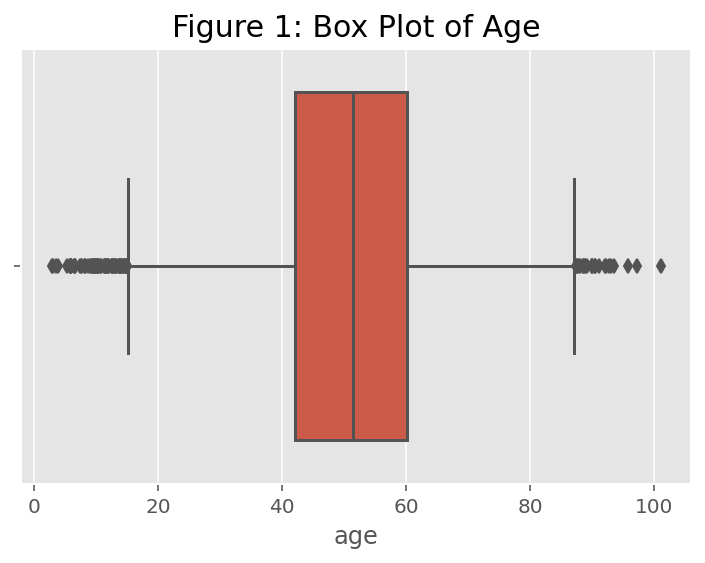

In [8]:
# get a box plot of age
sns.boxplot(data['age']).set_title('Figure 1: Box Plot of Age', fontsize = 15)
plt.show();

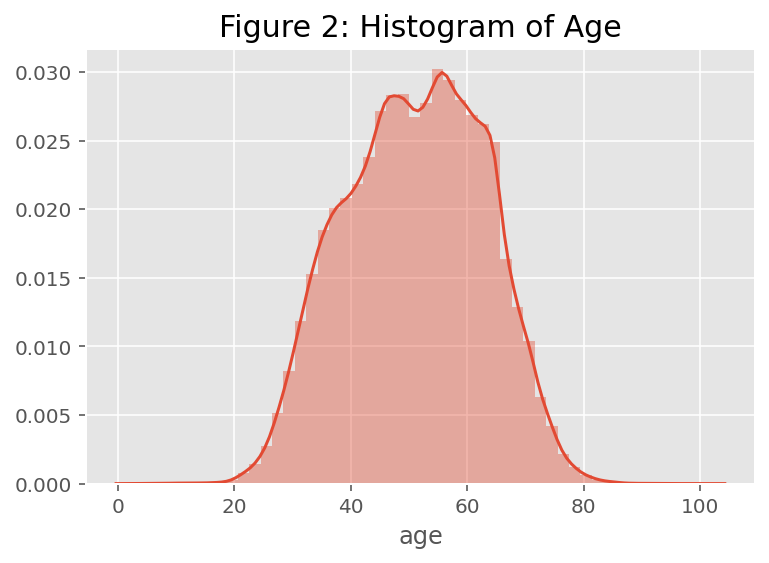

In [9]:
# get a histogram of age with kernel density estimate
sns.distplot(data['age'], kde = True).set_title('Figure 2: Histogram of Age', fontsize = 15)
plt.show();

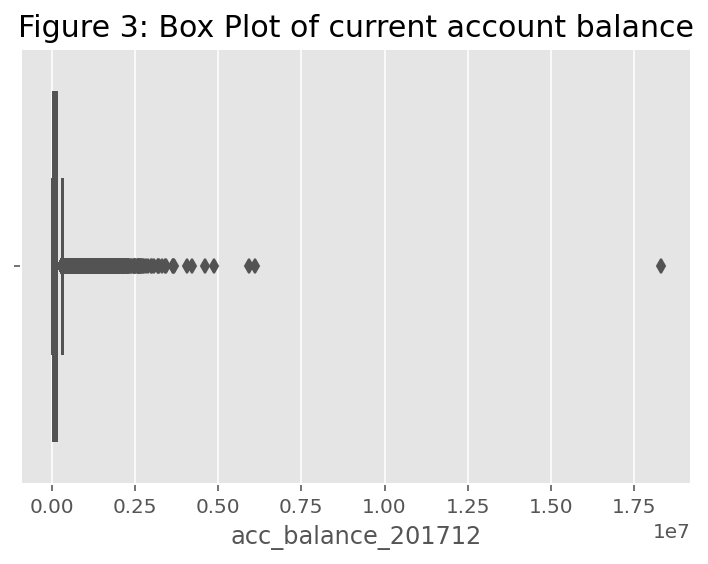

In [10]:
# get a box plot of current account balance
sns.boxplot(data['acc_balance_201712']).set_title('Figure 3: Box Plot of current account balance', fontsize = 15)
plt.show();

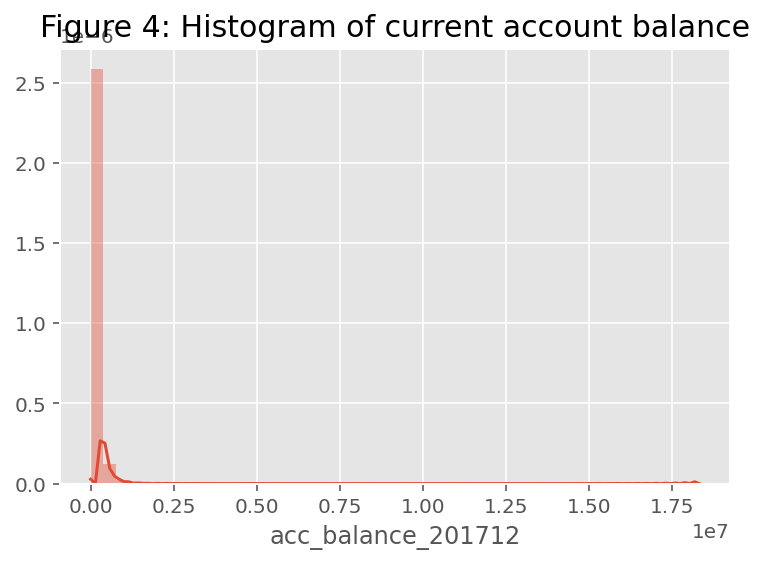

In [11]:
# get a histogram of account balance with kernel density estimate
sns.distplot(data['acc_balance_201712'], kde = True).set_title('Figure 4: Histogram of current account balance', fontsize = 15)
plt.show();

### Multivariate Visualisation

#### Scatterplot of Numeric Features and Age

The scatterplot in Figure 4 shows no clear correlation between the last year balance and Current balance. 

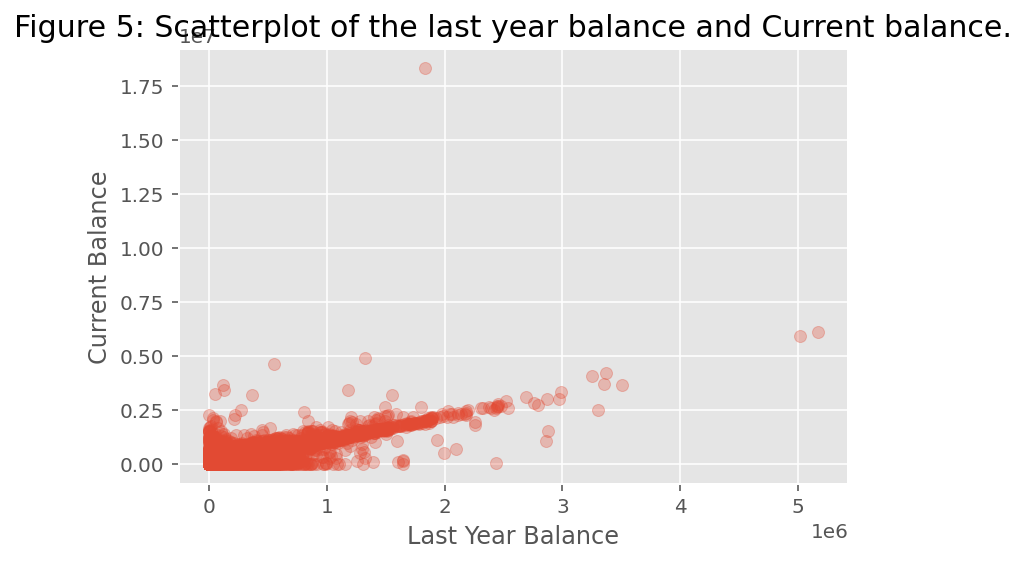

In [12]:
last_year = data['acc_balance_201612']

# get a scatter plot
plt.scatter(last_year, data['acc_balance_201712'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of the last year balance and Current balance.', fontsize = 15)
plt.xlabel('Last Year Balance')
plt.ylabel('Current Balance')
plt.show();

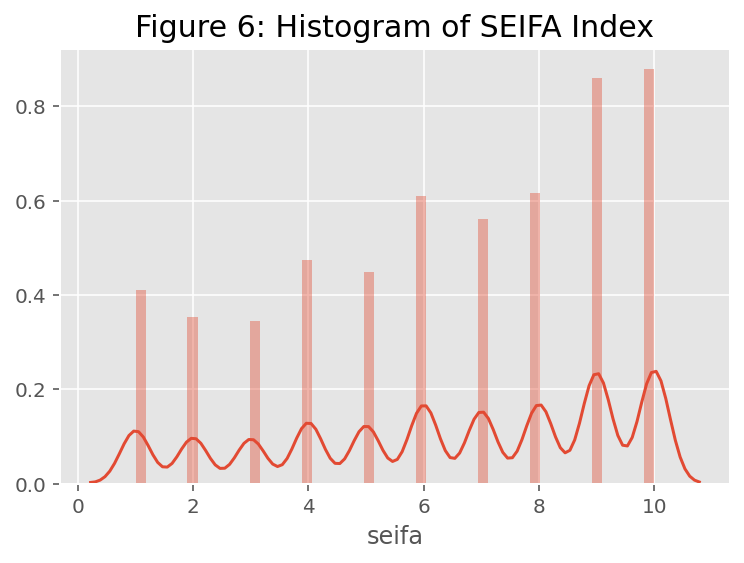

In [13]:
# get a histogram of SEIFA Index with kernel density estimate
sns.distplot(data['seifa'], kde = True).set_title('Figure 6: Histogram of SEIFA Index', fontsize = 15)
plt.show();

### Categorical Attributes by Age

We can see that the distribution of age between each gender is similar. 

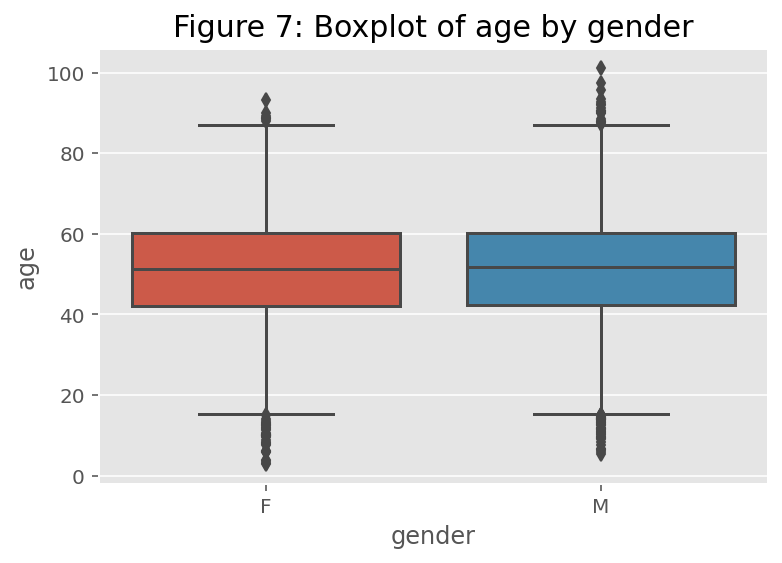

In [14]:
# Creating a boxplot
sns.boxplot(data['gender'], data['age']);
plt.title('Figure 7: Boxplot of age by gender', fontsize = 15)
plt.show();

Although there is no clear overall pattern, we observe in Figure 8 that men contribute in lower seifa index more than women. 

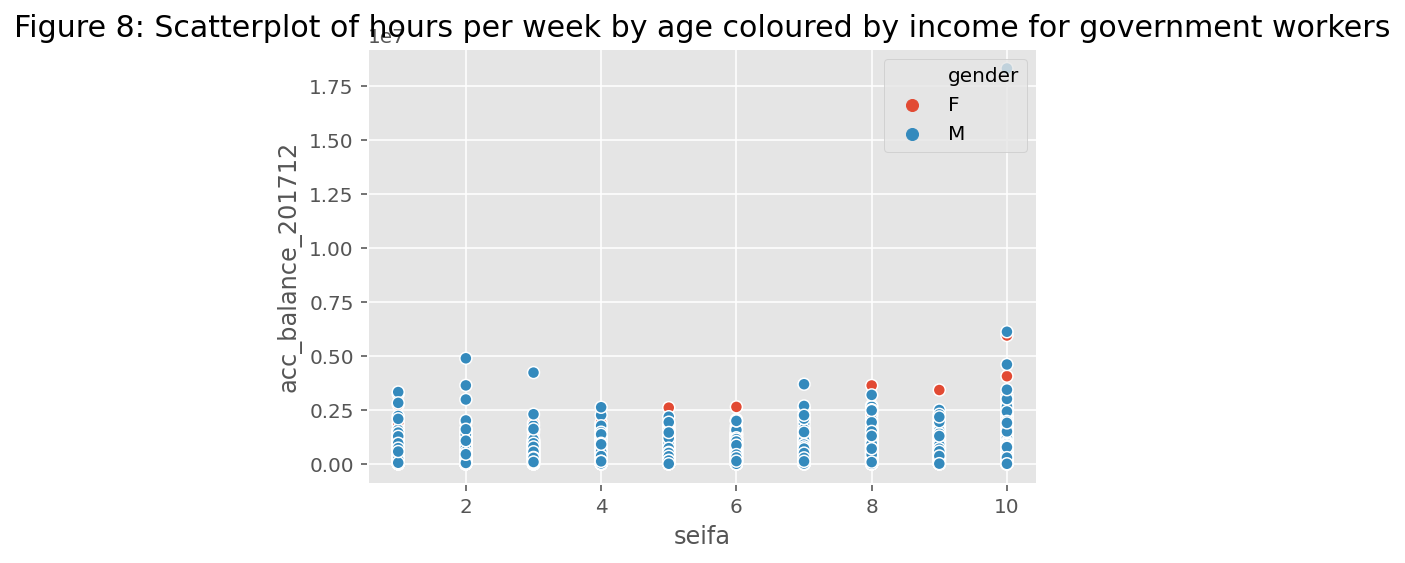

In [15]:
# creating a scatterplot
sns.scatterplot(data['seifa'], data['acc_balance_201712'], hue = data['gender'])
plt.title('Figure 8: Scatterplot of hours per week by age coloured by income for government workers', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

## Useing Tableau for data Visualisation:

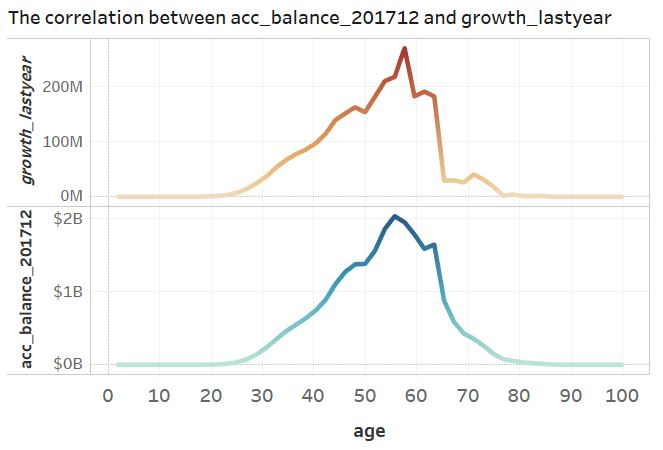

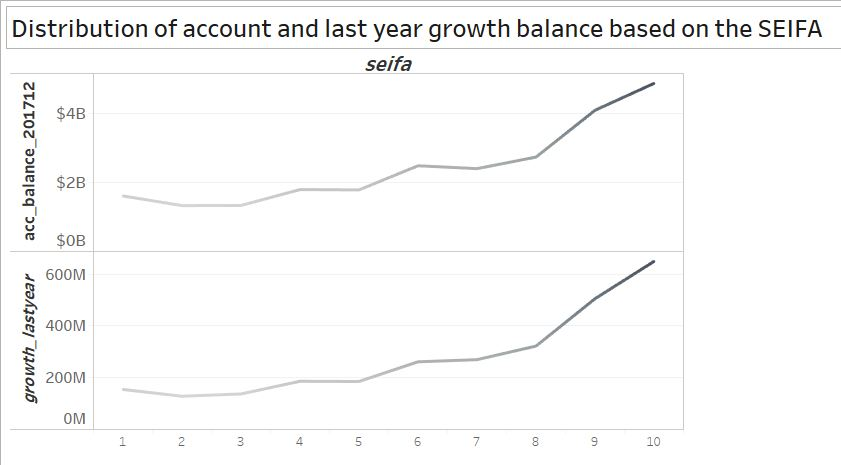

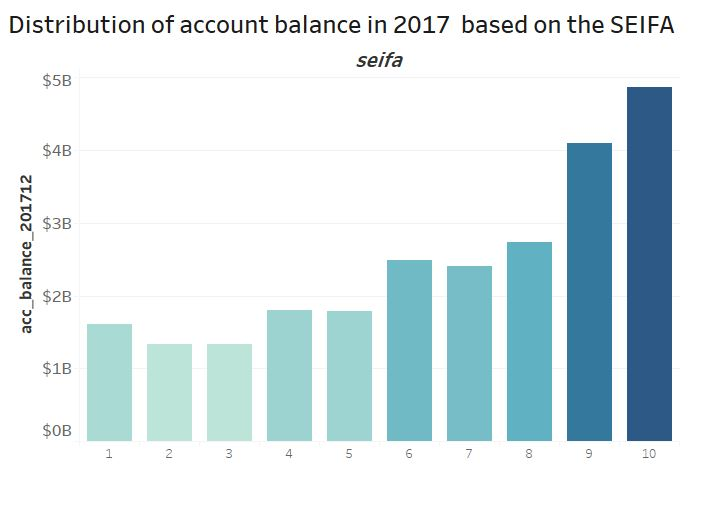

The account balance of those customers is decreasing all years from 2013 to 2019 makes the projection of account balance nonrealistic and accurate based on our method of median growth in retired age not realistic, however using the median of previous balances is to specify a overal view of balance history of customers inevitable since there are a lot of outlier data points.(see below graphs)

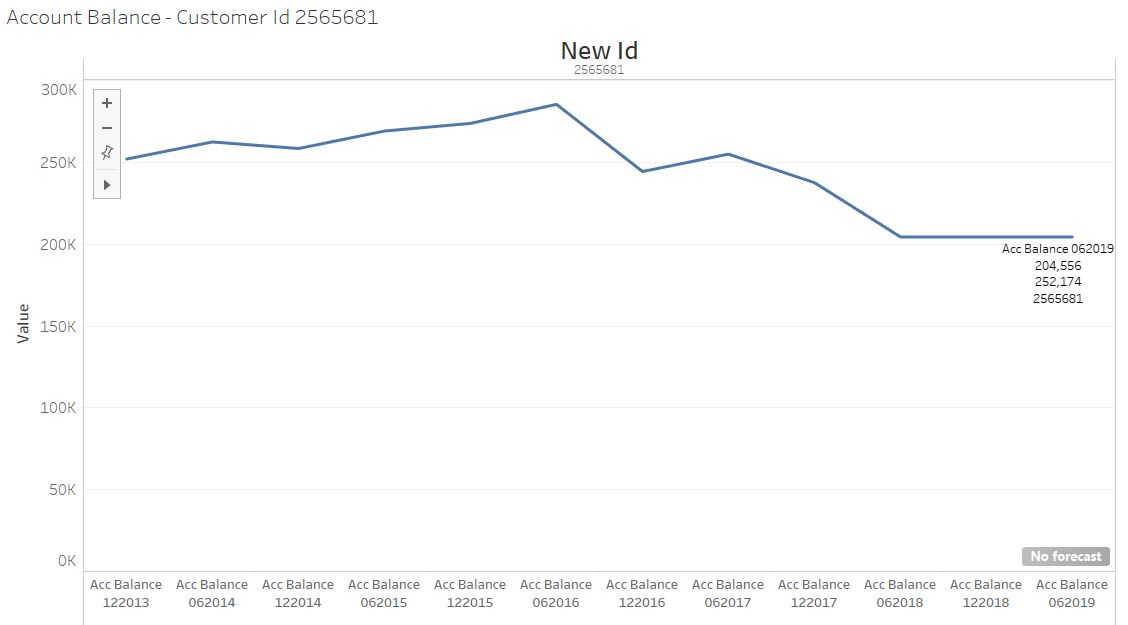

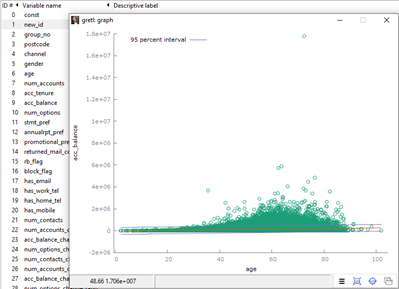

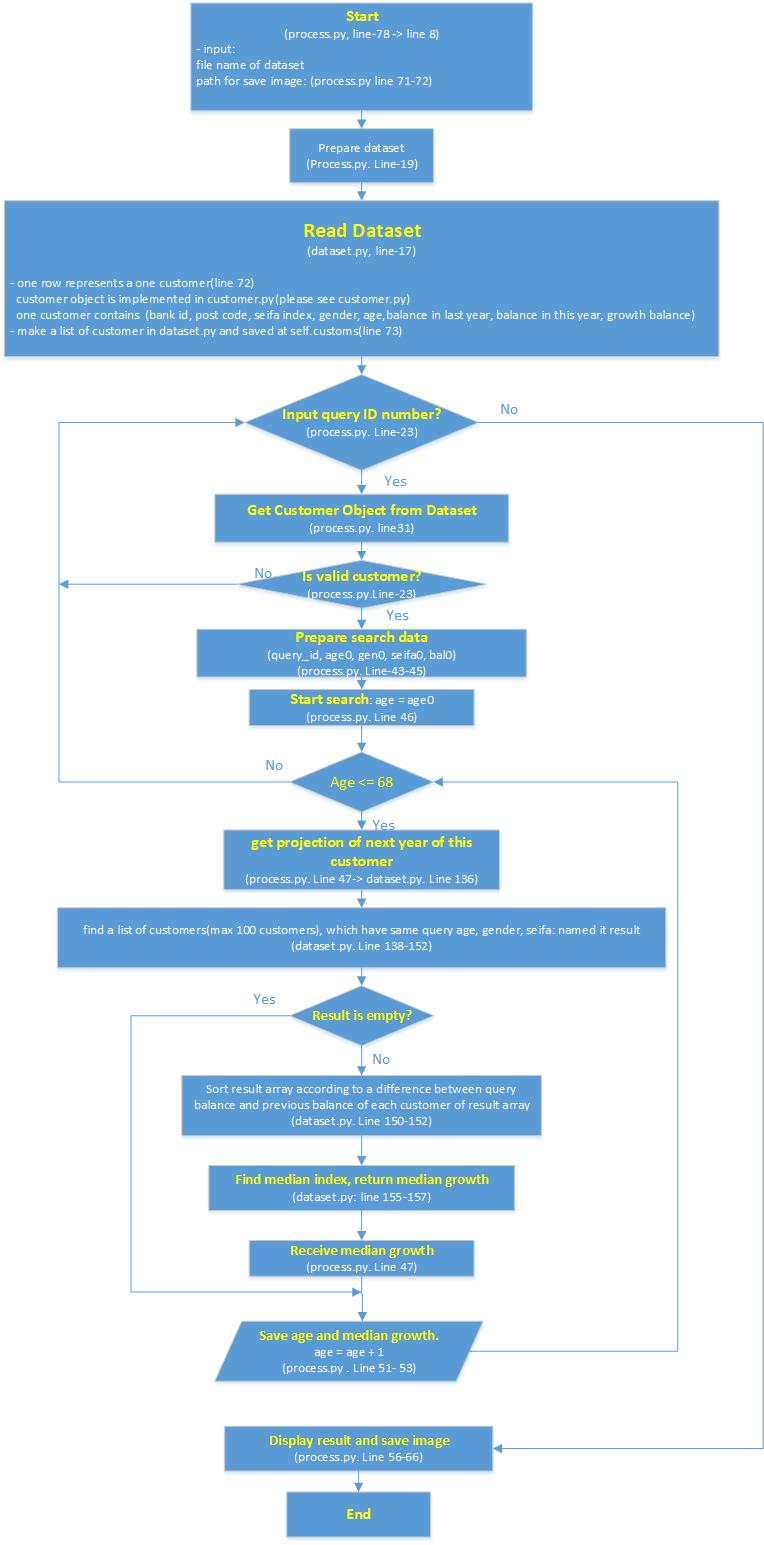

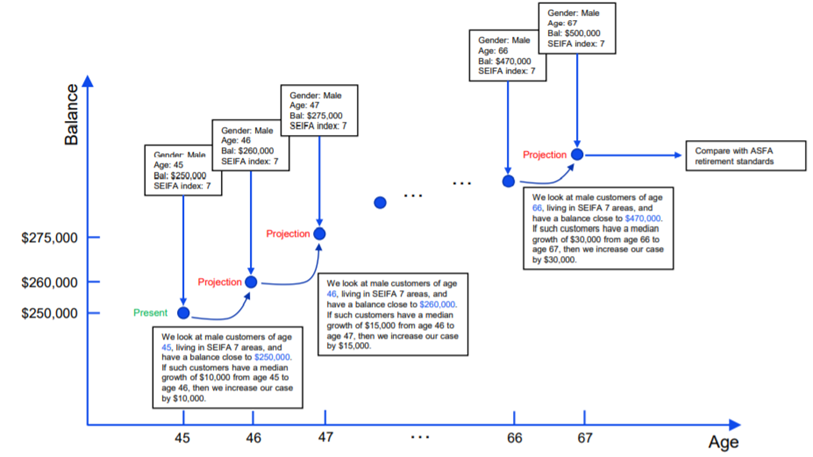

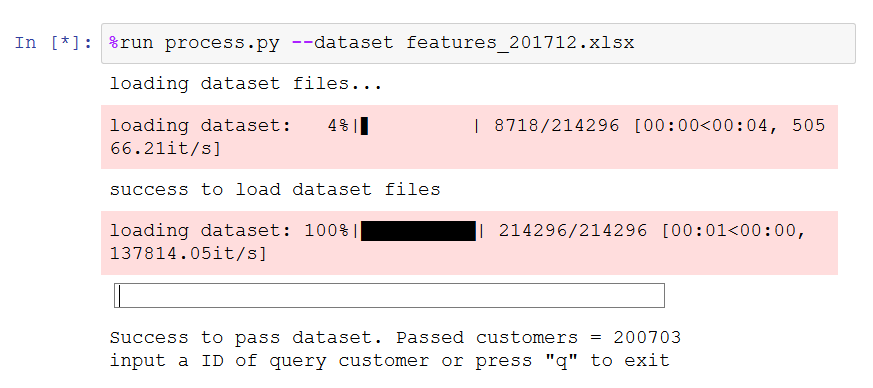

loading dataset files...


loading dataset:   4%|▍         | 8718/214296 [00:00<00:04, 50566.21it/s]

success to load dataset files


loading dataset: 100%|██████████| 214296/214296 [00:01<00:00, 137814.05it/s]


Success to pass dataset. Passed customers = 200703
input a ID of query customer or press "q" to exit
1472251


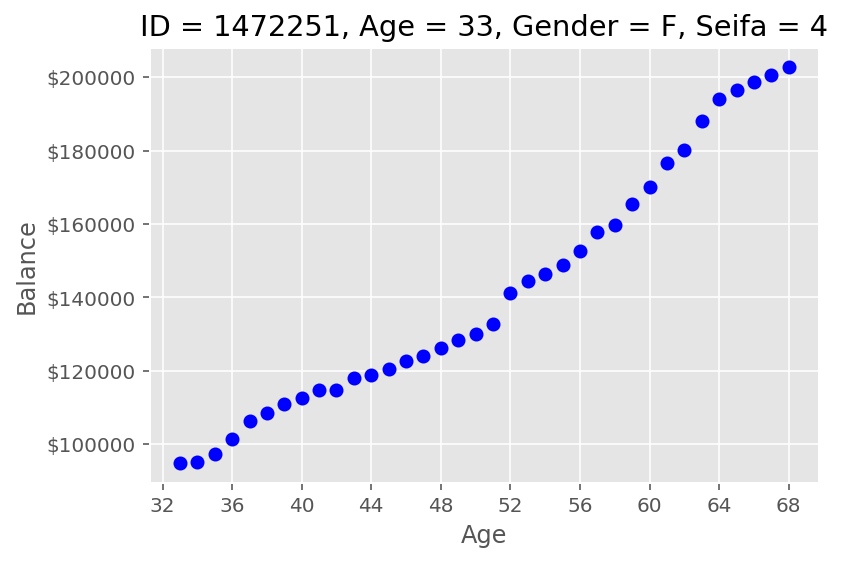

input a ID of query customer or press "q" to exit
1275480


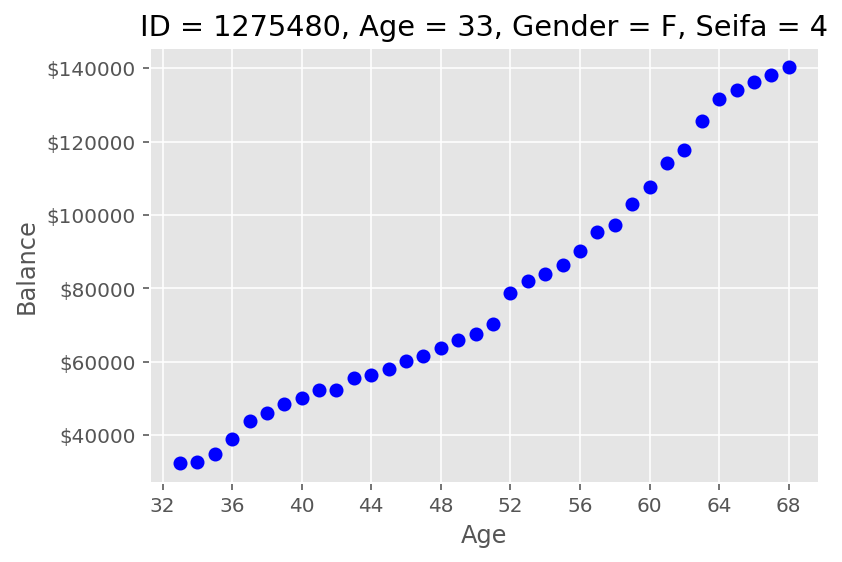

input a ID of query customer or press "q" to exit
1784008


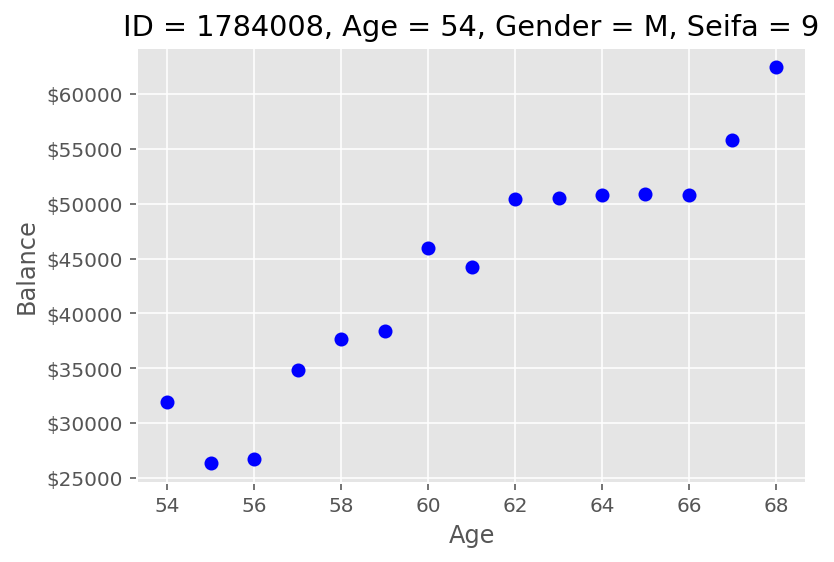

input a ID of query customer or press "q" to exit
2388009


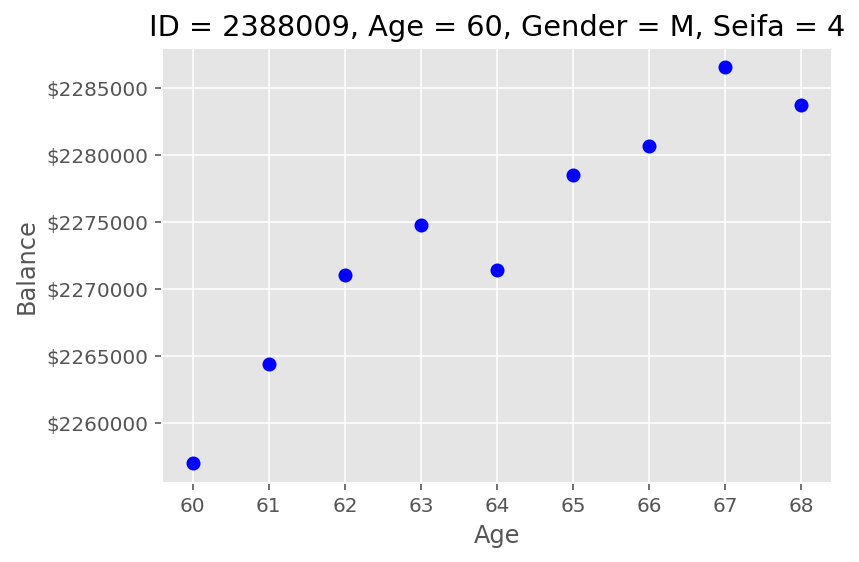

input a ID of query customer or press "q" to exit
2870889
Age is 68, continue


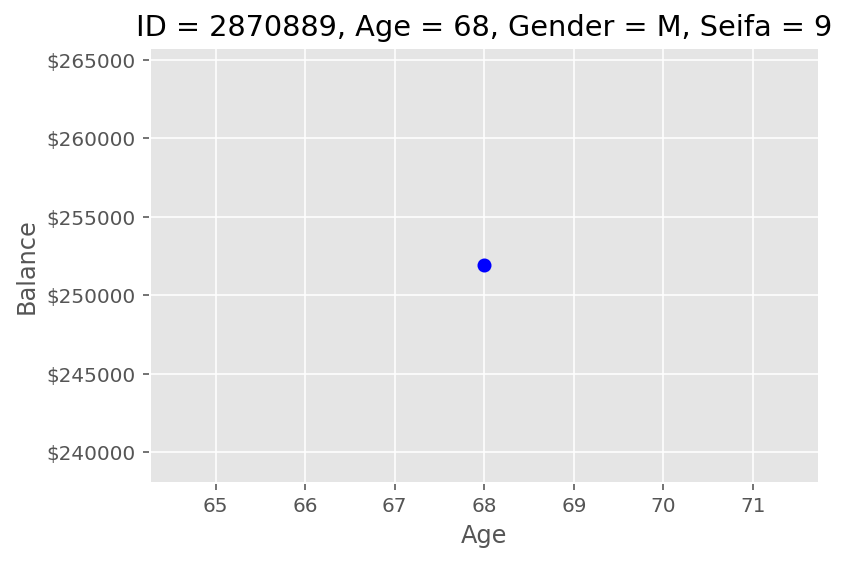

input a ID of query customer or press "q" to exit
1577036


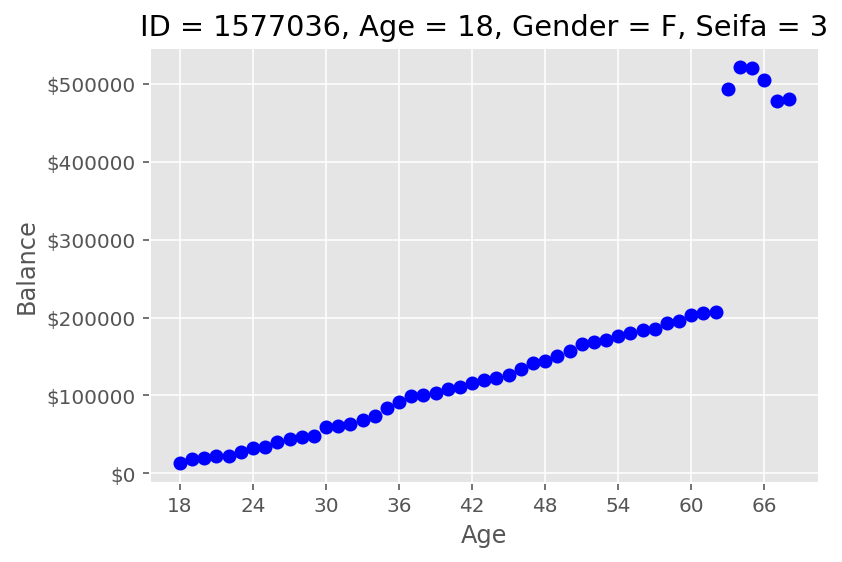

input a ID of query customer or press "q" to exit
2196123


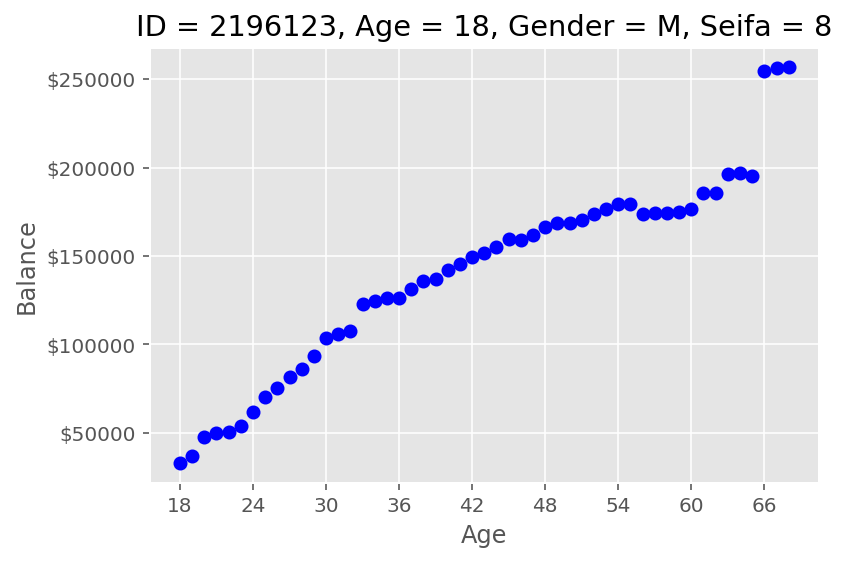

input a ID of query customer or press "q" to exit
1605983


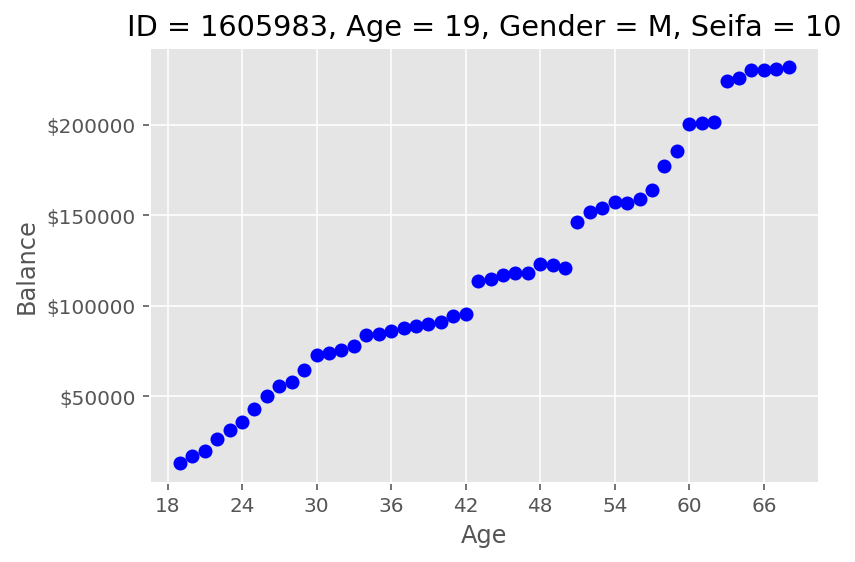

input a ID of query customer or press "q" to exit


In [ ]:
%run process.py --dataset features_201712.xlsx

## Summary and Conclusions

Using the median growth of previous account balances able us to project the account balance in retired age. In addition, our method has some significant issues for those customers are an outlier, and also those who have a high degree of fluctuation in their account balance. This method works very well for most of the cases. A good next step might involve adding some interaction terms and maybe some other higher new features like seifa index to our prediction calculation to improve the prediction accuracy. For instance, we can define a new variable based on the seifa index number and name it as "seifa_coefficient".